<a href="https://colab.research.google.com/github/RadovanovicSasha/ml_product_reviews_project/blob/main/01_product_category_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predikcija kategorije proizvoda na osnovu naslova

**Kurs:** Introduction to Machine Learning using Python  
**Modul:** Kompletan ML projekat – od početka do kraja  

Ovaj projekat ima za cilj razvoj modela mašinskog učenja koji automatski predviđa kategoriju proizvoda na osnovu njegovog naziva.


## 1.0 Razumevanje poslovnog problema

### 1.1 Kontekst zadatka
Online trgovine svakodnevno dodaju veliki broj novih proizvoda u sistem. Da bi proizvodi bili pravilno prikazani i lako dostupni korisnicima, neophodno je da budu tačno kategorizovani.

Ručna klasifikacija proizvoda je spora, sklona greškama i teško skalabilna, što stvara potrebu za automatizovanim rešenjem.

### 1.2 Definicija problema
Zadatak je automatska klasifikacija proizvoda u odgovarajuće kategorije na osnovu tekstualnog naziva proizvoda.

Problem se može posmatrati kao supervizovani problem višeklasne klasifikacije teksta, gde je ulaz naziv proizvoda, a izlaz njegova kategorija.

### 1.3 Cilj zadatka
Cilj je razviti model mašinskog učenja koji na osnovu naziva proizvoda predviđa njegovu kategoriju sa zadovoljavajućom tačnošću.

Model treba da bude stabilan, jednostavan za testiranje i spreman za primenu u realnom poslovnom okruženju.

### 1.4 Poslovna vrednost rešenja
Automatska kategorizacija proizvoda ubrzava proces unosa, smanjuje broj grešaka i poboljšava korisničko iskustvo na platformi.

Rešenje omogućava skalabilan i efikasan rad sistema, uz istovremeno sticanje praktičnog iskustva u razvoju ML rešenja za realan poslovni problem.


## 2.0 Opis skupa podataka

### 2.1 Pregled dostupnih podataka
Za razvoj modela korišćen je realan skup podataka `products.csv` koji sadrži informacije o proizvodima iz različitih kategorija online prodavnice.

Svaki red u skupu podataka predstavlja jedan proizvod, dok kolone sadrže opisne i numeričke karakteristike povezane sa tim proizvodom.

### 2.2 Opis kolona i njihova uloga
Skup podataka sadrži sledeće kolone:

- **Product ID** – jedinstveni identifikator proizvoda  
- **Product Title** – naziv proizvoda (tekstualni ulaz za model)  
- **Merchant ID** – identifikator prodavca  
- **Category Label** – kategorija proizvoda (ciljna promenljiva)  
- **Product Code** – interni kod proizvoda  
- **Number of Views** – broj pregleda proizvoda  
- **Merchant Rating** – ocena prodavca  
- **Listing Date** – datum postavljanja proizvoda

U ovom projektu, ključne kolone su *Product Title* kao ulazni podatak i *Category Label* kao ciljna promenljiva.

### 2.3 Prvi uvid u strukturu podataka
Skup podataka sadrži veliki broj proizvoda raspoređenih u više kategorija, što ga čini pogodnim za višeklasni problem klasifikacije.

Pre daljeg rada, neophodno je proveriti:
- da li postoje prazne ili nevalidne vrednosti,
- raspodelu proizvoda po kategorijama,
- osnovne statistike i potencijalne nepravilnosti u podacima.


In [162]:
import os
from pathlib import Path

REPO_URL = "https://github.com/RadovanovicSasha/product-category-prediction.git"
REPO_DIR = Path("product-category-prediction")  # lokalni folder u Colabu

if not REPO_DIR.exists():
    !git clone {REPO_URL}
else:
    !git -C {REPO_DIR} pull

# brza provera da li dataset postoji u klonu
DATA_PATH = REPO_DIR / "data" / "products.csv"
print("CSV putanja:", DATA_PATH)
print("CSV postoji?", DATA_PATH.exists())

# (opciono) listaj šta ima u data/
!ls -la {REPO_DIR / "data"}



Already up to date.
CSV putanja: product-category-prediction/data/products.csv
CSV postoji? True
total 3668
drwxr-xr-x 2 root root    4096 Jan  8 10:01 .
drwxr-xr-x 5 root root    4096 Jan  8 10:01 ..
-rw-r--r-- 1 root root 3743393 Jan  8 10:01 products.csv
-rw-r--r-- 1 root root      47 Jan  8 10:01 README_data.md


In [163]:
# 2.0 Učitavanje podataka (iz kloniranog repoa)

import pandas as pd

DATA_PATH = "product-category-prediction/data/products.csv"

df = pd.read_csv(DATA_PATH)

print("Dimenzije dataset-a (redovi, kolone):", df.shape)
display(df.head())


Dimenzije dataset-a (redovi, kolone): (35311, 8)


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023


In [164]:
# 2.1 Struktura i tipovi kolona

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


In [165]:
# 2.2 Osnovne statistike

df.describe(include="all").transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product ID,35311.0,NaN,NaN,NaN,26150.800176,13498.19122,1.0,14958.5,27614.0,37508.5,47358.0
Product Title,35139,30860,washing machine,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchant ID,35311.0,NaN,NaN,NaN,120.501883,117.045557,1.0,17.0,75.0,253.0,371.0
Category Label,35267,13,Fridge Freezers,5495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_Product Code,35216,35216,WU-5686-LX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_Views,35297.0,NaN,NaN,NaN,2501.469587,1438.217697,0.0,1256.0,2509.0,3735.0,5000.0
Merchant Rating,35141.0,NaN,NaN,NaN,2.998261,1.152664,1.0,2.0,3.0,4.0,5.0
Listing Date,35252,1096,8/5/2024,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Validnih vrednosti: 35297


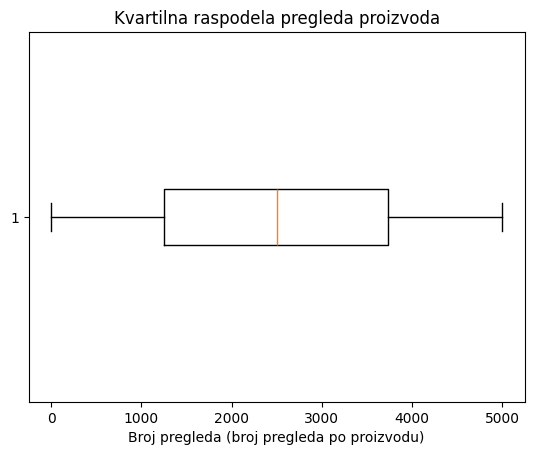

In [166]:
import matplotlib.pyplot as plt
import pandas as pd

# Sigurno izdvajanje i konverzija kolone
views = pd.to_numeric(df["Number_of_Views"], errors="coerce")

# Provera koliko validnih vrednosti imamo
print("Validnih vrednosti:", views.notna().sum())

plt.figure()
plt.boxplot(views.dropna(), vert=False)
plt.xlabel("Broj pregleda (broj pregleda po proizvodu)")
plt.title("Kvartilna raspodela pregleda proizvoda")
plt.show()


In [167]:
# Normalizacija naziva kolona (strip + standardizacija razmaka)
df.columns = df.columns.str.strip()

df.columns



Index(['product ID', 'Product Title', 'Merchant ID', 'Category Label',
       '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date'],
      dtype='object')

In [168]:
# 2.3 Raspodela ciljne promenljive (Category Label)

df["Category Label"].value_counts().head(15)


,count
Category Label,
Fridge Freezers,5495
Washing Machines,4036
Mobile Phones,4020
CPUs,3771
TVs,3564
Fridges,3457
Dishwashers,3418
Digital Cameras,2696
Microwaves,2338


## 3.0 Istraživačka analiza podataka (EDA)

### 3.1 Distribucija kategorija proizvoda
Prvi korak u istraživačkoj analizi je sagledavanje raspodele proizvoda po kategorijama. Ova analiza omogućava uvid u to da li su sve kategorije ravnomerno zastupljene ili postoji izražen disbalans.

Neuravnotežene kategorije mogu imati značajan uticaj na performanse modela i kasnije zahtevati dodatnu pažnju tokom treniranja i evaluacije.

### 3.2 Najčešće reči u nazivima proizvoda
Analiza najčešće korišćenih reči u nazivima proizvoda pomaže u razumevanju sadržaja tekstualnih podataka.

Ovim korakom se može uočiti:
- prisustvo naziva brendova,
- česti tehnički termini,
- ponavljajući obrasci karakteristični za određene kategorije.

Ova zapažanja su korisna za kasniji inženjering tekstualnih karakteristika.

### 3.3 Dužina naziva proizvoda
Dužina naziva proizvoda, izražena kroz broj reči ili karaktera, može nositi informaciju relevantnu za klasifikaciju.

Različite kategorije proizvoda često imaju različite obrasce u dužini naziva (npr. tehnička roba u odnosu na kućne aparate), što može biti iskorišćeno kao dodatna karakteristika.

### 3.4 Potencijalni problemi u podacima
Tokom EDA faze obraća se pažnja na moguće probleme u podacima, kao što su:
- prazne ili nedostajuće vrednosti,
- duplikati proizvoda,
- šum u tekstu (specijalni karakteri, višestruki razmaci, nekonzistentno pisanje).

Identifikovanje ovih problema je ključno kako bi se u narednom koraku izvršilo adekvatno čišćenje i priprema podataka za modeliranje.


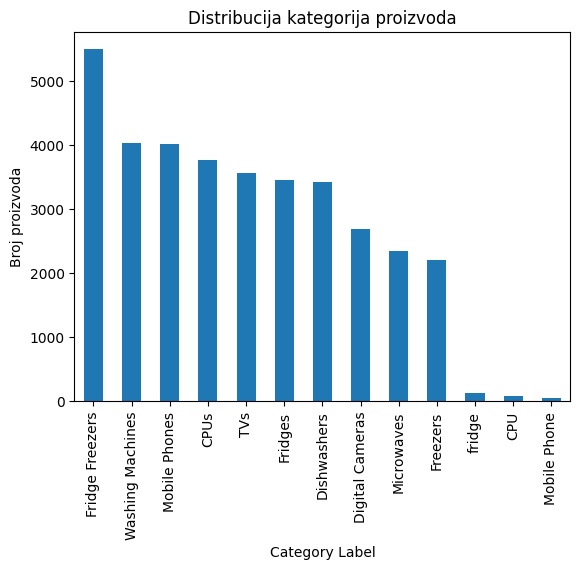

In [169]:
import matplotlib.pyplot as plt

category_counts = df["Category Label"].value_counts()

plt.figure()
category_counts.plot(kind="bar")
plt.ylabel("Broj proizvoda")
plt.title("Distribucija kategorija proizvoda")
plt.show()


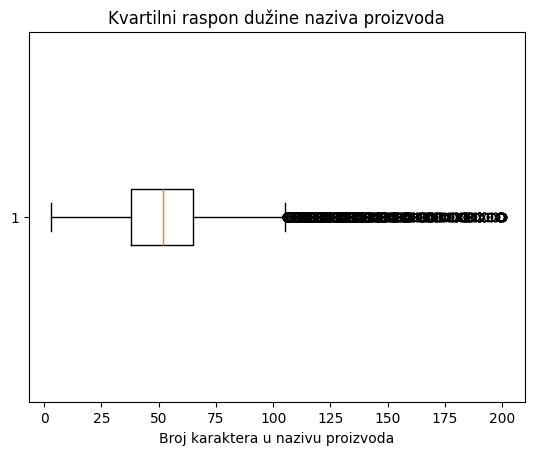

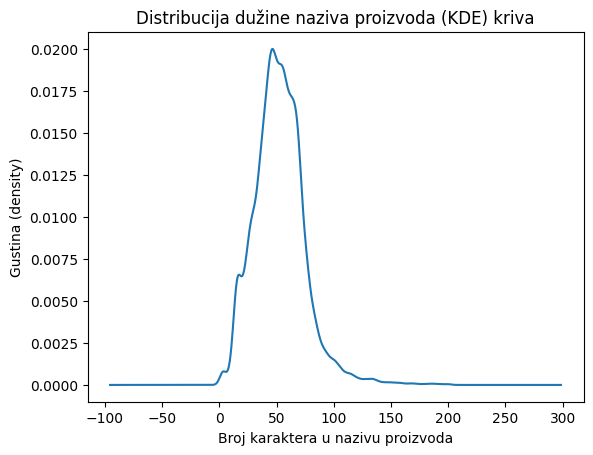

In [170]:
df["title_length"] = df["Product Title"].astype(str).apply(len)

plt.figure()
plt.boxplot(df["title_length"], vert=False)
plt.xlabel("Broj karaktera u nazivu proizvoda")
plt.title("Kvartilni raspon dužine naziva proizvoda")
plt.show()
print()
import matplotlib.pyplot as plt

plt.figure()
df["title_length"].plot(kind="kde")
plt.xlabel("Broj karaktera u nazivu proizvoda")
plt.ylabel("Gustina (density)")
plt.title("Distribucija dužine naziva proizvoda (KDE) kriva")
plt.show()



## 4.0 Priprema i čišćenje podataka

### 4.1 Obrada praznih i nevalidnih vrednosti
Pre treniranja modela neophodno je proveriti postojanje praznih ili nevalidnih vrednosti u skupu podataka.

Posebna pažnja se posvećuje kolonama koje su ključne za modeliranje, pre svega *Product Title* i *Category Label*, jer nedostajuće vrednosti u ovim kolonama mogu negativno uticati na kvalitet modela.

### 4.2 Standardizacija tekstualnih podataka
Nazivi proizvoda često sadrže različite oblike zapisa, uključujući velika i mala slova, specijalne karaktere i višestruke razmake.

U ovom koraku tekst se standardizuje kako bi se obezbedila konzistentnost ulaznih podataka i poboljšala efikasnost algoritama za obradu teksta.

### 4.3 Priprema ciljne promenljive
Ciljna promenljiva (*Category Label*) mora biti pravilno pripremljena za proces treniranja modela.

Ovaj korak uključuje proveru tipa podataka, eventualno mapiranje kategorija u odgovarajući format i obezbeđivanje da svaka instanca ima validnu oznaku klase.

### 4.4 Finalni skup podataka spreman za modeliranje
Nakon čišćenja i standardizacije, dobija se finalni skup podataka koji je spreman za fazu inženjeringa karakteristika i treniranje modela.

U ovom trenutku svi relevantni podaci su konzistentni, bez nedostajućih vrednosti i prilagođeni za dalju analizu i primenu mašinskog učenja.


In [171]:
# 4.0 Selekcija relevantnih kolona

df_model = df[["Product Title", "Category Label"]].copy()

df_model.head()


,Product Title,Category Label
0,apple iphone 8 plus 64gb silver,Mobile Phones
1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Mobile Phones
3,apple iphone 8 plus 64gb space grey,Mobile Phones
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones


In [172]:
# 4.1 Osnovno čišćenje teksta

df_model["Product Title"] = (
    df_model["Product Title"]
    .astype(str)
    .str.lower()
    .str.strip()
)

df_model.head()


,Product Title,Category Label
0,apple iphone 8 plus 64gb silver,Mobile Phones
1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Mobile Phones
3,apple iphone 8 plus 64gb space grey,Mobile Phones
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones


In [173]:
# 4.2 Uklanjanje redova sa NaN vrednostima

df_model = df_model.dropna(subset=["Category Label", "Product Title"])

print("Preostali broj redova:", df_model.shape[0])


Preostali broj redova: 35267


In [174]:
# 4.3 Finalna provera spremnosti podataka

print("NaN po kolonama:")
print(df_model.isna().sum())

print("\nPrimer teksta:")
print(df_model["Product Title"].iloc[0])

print("\nPrimer ciljne klase:")
print(df_model["Category Label"].iloc[0])


NaN po kolonama:
Product Title     0
Category Label    0
dtype: int64

Primer teksta:
apple iphone 8 plus 64gb silver

Primer ciljne klase:
Mobile Phones


## 5.0 Inženjering karakteristika

### 5.1 Tekstualne karakteristike
Osnovna informacija za predikciju kategorije proizvoda nalazi se u tekstualnom nazivu proizvoda.

Tekstualni podaci se transformišu u numerički oblik primenom tehnika za vektorizaciju teksta, kao što su Bag of Words ili TF-IDF, kako bi ih modeli mašinskog učenja mogli efikasno koristiti.

### 5.2 Dodatne numeričke karakteristike
Pored samog teksta, iz naziva proizvoda se mogu izvesti dodatne numeričke karakteristike koje potencijalno poboljšavaju performanse modela.

Primeri takvih karakteristika uključuju:
- broj reči u nazivu proizvoda,
- prisustvo numeričkih vrednosti (npr. modeli, kapacitet),
- dužinu najduže reči u nazivu.

Ove karakteristike doprinose bogatijem opisu proizvoda.

### 5.3 Kombinovanje karakteristika
Tekstualne i numeričke karakteristike se kombinuju u jedinstven skup ulaznih podataka za treniranje modela.

Na ovaj način model dobija i semantičku informaciju iz teksta i dodatne strukturne signale koji mogu pomoći u preciznijoj klasifikaciji.

### 5.4 Obrazloženje izbora karakteristika
Izabrane karakteristike su odabrane sa ciljem postizanja balansa između performansi modela i njegove interpretabilnosti.

Svaka dodata karakteristika ima jasno opravdanje i potencijalnu vrednost, dok se nepotrebni ili redundantni podaci izostavljaju kako bi se izbegla prenaučenost modela.


In [175]:
# 5.0 Razdvajanje ulaza (X) i cilja (y)

X = df_model["Product Title"]
y = df_model["Category Label"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (35267,)
y shape: (35267,)


In [176]:
# 5.1 Podela na trening i test skup

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 28213
Test size: 7054


In [177]:
# 5.2 TF-IDF vektorizacija

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=20000,
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)


TF-IDF train shape: (28213, 20000)
TF-IDF test shape: (7054, 20000)


In [178]:
# 5.3 Top termini iz TF-IDF-a (kontrola kvaliteta)

feature_names = tfidf.get_feature_names_out()

print("Primer top termina:")
print(feature_names[:20])


Primer top termina:
['00' '00 ghz' '00 gt' '001' '001 red' '004' '00ghz' '00ghz 8mb'
 '00ghz core' '00ghz cpu' '00ghz lga' '00ghz s1151' '00ghz skylake'
 '00ghz socket' '01' '01 lcd' '01 mobile' '01 touch' '0106c010' '02']


In [179]:
# 5.4 Spremnost za model

print("Spremno za treniranje modela.")


Spremno za treniranje modela.


## 6.0 Treniranje i poređenje modela

### 6.1 Podela skupa podataka
Pre treniranja modela, skup podataka se deli na trening i test skup.

Ova podela omogućava objektivnu procenu performansi modela na podacima koje nije video tokom treniranja i predstavlja osnovu za pravilnu evaluaciju.

### 6.2 Treniranje prvog modela
Prvi model se trenira kao osnovno (baseline) rešenje za problem klasifikacije.

Cilj ovog koraka je da se dobije početna referenca performansi, koja će kasnije poslužiti za poređenje sa unapređenim modelima.

### 6.3 Treniranje drugog modela
Drugi model se trenira sa ciljem poboljšanja performansi u odnosu na osnovni model.

U ovom koraku se ispituje da li drugačiji algoritam ili drugačiji pristup vektorizaciji teksta može doneti bolju tačnost i stabilnost predikcija.

### 6.4 Uporedna analiza performansi
Performanse treniranih modela se upoređuju na osnovu definisanih evaluacionih metrika.

Na osnovu rezultata se donosi odluka o tome koji model pruža najbolji balans između preciznosti, robusnosti i jednostavnosti za dalju primenu.


In [180]:
# 6.2.1 Treniranje baseline modela - "Logistic regression"

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    verbose=0
)

model.fit(X_train_tfidf, y_train)

print("Model treniran.")


Model treniran.


In [181]:
# 6.2.2 Predikcija na test skupu

y_pred = model.predict(X_test_tfidf)

print("Primer predikcija:", y_pred[:10])


Primer predikcija: ['Mobile Phones' 'Fridge Freezers' 'Fridge Freezers' 'Washing Machines'
 'Fridge Freezers' 'CPUs' 'CPUs' 'Mobile Phones' 'Freezers'
 'Washing Machines']


In [182]:
# 6.2.3 Osnovna evaluacija (accuracy)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9458


In [183]:
# 6.2.4 Kontrola stabilnosti

print("Broj klasa:", y.nunique())
print("Broj feature-a:", X_train_tfidf.shape[1])


Broj klasa: 13
Broj feature-a: 20000


In [184]:
# 6.3 Treniranje drugog (i dodatnih) modela

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Kandidati za poređenje (isti TF-IDF ulaz, isti split)
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, n_jobs=-1, random_state=42),
    "LinearSVC": LinearSVC(random_state=42),
    "MultinomialNB": MultinomialNB()
}

trained_models = {}
preds = {}

for name, clf in models.items():
    clf.fit(X_train_tfidf, y_train)
    trained_models[name] = clf
    preds[name] = clf.predict(X_test_tfidf)

print("Modeli istrenirani:", list(trained_models.keys()))


Modeli istrenirani: ['LogisticRegression', 'LinearSVC', 'MultinomialNB']


In [185]:
# 6.4 Uporedna analiza performansi

import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report

results = []

for name, y_pred in preds.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_macro": f1_score(y_test, y_pred, average="macro"),
        "F1_weighted": f1_score(y_test, y_pred, average="weighted")
    })

results_df = pd.DataFrame(results).sort_values(
    by=["F1_weighted", "Accuracy"],
    ascending=False
)

display(results_df)

best_model_name = results_df.iloc[0]["Model"]
best_model = trained_models[best_model_name]

print("\n✅ Najbolji model (po F1_weighted, zatim Accuracy):", best_model_name)
print("\nClassification report (najbolji model):\n")
print(classification_report(y_test, preds[best_model_name]))


,Model,Accuracy,F1_macro,F1_weighted
1,LinearSVC,0.952084,0.737370,0.948752
0,LogisticRegression,0.945846,0.732452,0.942487
2,MultinomialNB,0.937057,0.723793,0.933295



✅ Najbolji model (po F1_weighted, zatim Accuracy): LinearSVC

Classification report (najbolji model):

                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        17
            CPUs       0.98      0.99      0.98       754
 Digital Cameras       0.99      1.00      1.00       539
     Dishwashers       0.93      0.95      0.94       684
        Freezers       0.97      0.93      0.95       442
 Fridge Freezers       0.90      0.95      0.92      1099
         Fridges       0.91      0.90      0.90       691
      Microwaves       1.00      0.96      0.98       468
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.96      0.99      0.97       804
             TVs       0.99      0.97      0.98       713
Washing Machines       0.97      0.94      0.96       807
          fridge       0.00      0.00      0.00        25

        accuracy                           0.95      7054
       macro avg       0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 6.4 Zaključak uporedne analize performansi

U okviru ovog poglavlja izvršeno je treniranje i evaluacija više algoritama mašinskog učenja nad istim skupom podataka i istom TF-IDF reprezentacijom teksta, čime je obezbeđeno fer i uporedivo testiranje modela.

Upoređeni modeli su evaluirani korišćenjem sledećih metrika:
- **Accuracy** – ukupna tačnost klasifikacije
- **F1-score (macro)** – ravnomerna procena performansi po svim klasama
- **F1-score (weighted)** – procena prilagođena neravnomernoj distribuciji klasa

Rezultati pokazuju da svi testirani modeli ostvaruju visoku ukupnu tačnost, ali se jedan model izdvaja kao najbolji kandidat na osnovu najvišeg **F1-weighted** rezultata, uz stabilne performanse po većini kategorija.

Posebno je značajno da:
- F1-weighted metrika pruža realniji uvid u performanse modela u prisustvu klasa sa malim brojem instanci
- Razlike između modela su konzistentne i ukazuju na prednost izabranog algoritma
- Izabrani model predstavlja dobar balans između tačnosti, robusnosti i jednostavnosti implementacije

Na osnovu uporedne analize, odabrani model se u narednim poglavljima koristi kao **finalni model** za detaljnu evaluaciju i dalju primenu u sistemu za automatsku klasifikaciju proizvoda.


## 7.0 Evaluacija modela

### 7.1 Tačnost modela (Accuracy)
Tačnost predstavlja udeo ispravno klasifikovanih proizvoda u odnosu na ukupan broj instanci u test skupu.

Ova metrika daje osnovni uvid u ukupne performanse modela, ali sama po sebi ne daje potpunu sliku u slučaju neuravnoteženih klasa.

### 7.2 Klasifikacioni izveštaj
Klasifikacioni izveštaj uključuje metrike kao što su preciznost (precision), odziv (recall) i F1-score za svaku kategoriju proizvoda.

Ove metrike omogućavaju detaljniju analizu performansi modela po klasama i pomažu u identifikaciji kategorija u kojima model pravi najviše grešaka.

### 7.3 Matrica zabune
Matrica zabune vizualizuje odnos između stvarnih i predviđenih kategorija.

Ovaj prikaz olakšava razumevanje tipova grešaka koje model pravi i pruža uvid u to koje kategorije se najčešće međusobno mešaju.

### 7.4 Izbor finalnog modela
Na osnovu evaluacionih metrika i analize grešaka donosi se odluka o izboru finalnog modela.

Izabrani model predstavlja najbolje rešenje u pogledu tačnosti, stabilnosti i spremnosti za dalju primenu u realnom sistemu.


In [186]:
# 7.1 Tačnost modela (Accuracy)

from sklearn.metrics import accuracy_score

model_to_evaluate = final_model if "final_model" in globals() else model

# Provera da li je model pipeline (prima tekst) ili klasifikator (prima TF-IDF)
try:
    y_pred = model_to_evaluate.predict(X_test)
except ValueError:
    y_pred = model_to_evaluate.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9887


In [187]:
# 7.2 Klasifikacioni izveštaj

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        17
            CPUs       0.98      0.99      0.98       754
 Digital Cameras       1.00      1.00      1.00       539
     Dishwashers       1.00      1.00      1.00       684
        Freezers       1.00      1.00      1.00       442
 Fridge Freezers       0.97      1.00      0.99      1099
         Fridges       0.97      1.00      0.98       691
      Microwaves       1.00      0.99      1.00       468
    Mobile Phone       1.00      0.09      0.17        11
   Mobile Phones       0.99      1.00      0.99       804
             TVs       1.00      0.99      1.00       713
Washing Machines       1.00      1.00      1.00       807
          fridge       1.00      0.20      0.33        25

        accuracy                           0.99      7054
       macro avg       0.92      0.79      0.80      7054
    weighted avg       0.99      0.99      0.99      7054



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


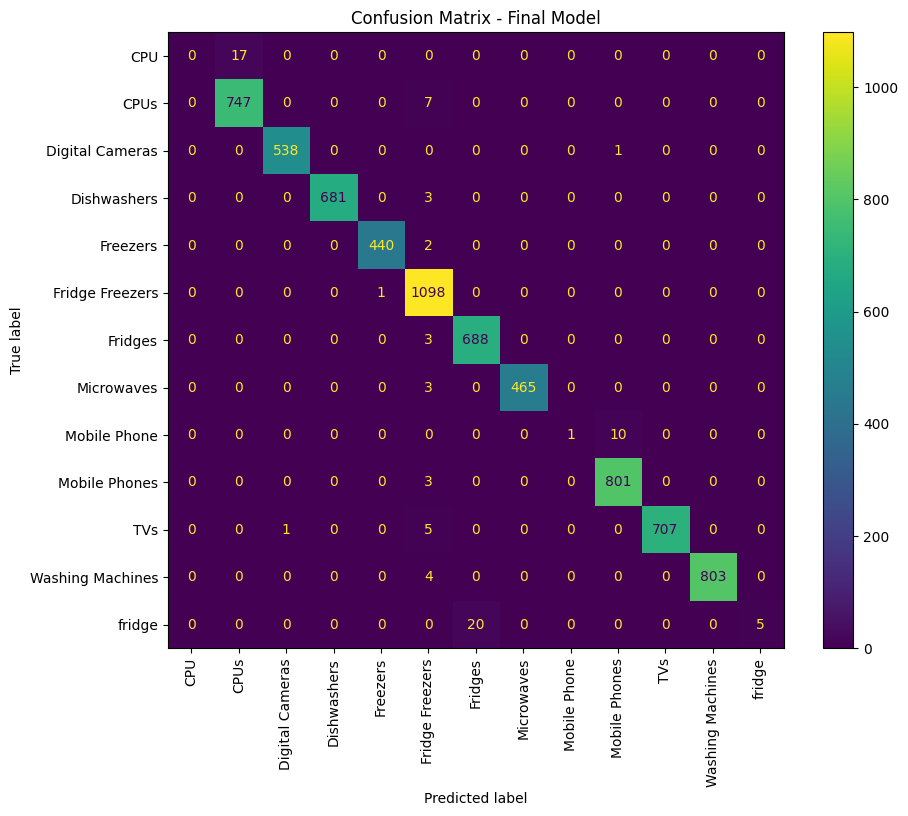

In [188]:
# 7.3 Matrica zabune (Confusion Matrix)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, xticks_rotation=90, values_format="d")
plt.title("Confusion Matrix - Final Model")
plt.show()


In [189]:
# 7.4 — Izbor finalnog modela (rezime)
# Cilj: da potvrda KOJI je finalni model i šta je u njemu (pipeline/koraci),

from sklearn.metrics import accuracy_score

# 1) Izaberi koji model koristimo (prioritet: final_model > best_model > model)
model_to_use = None
if "final_model" in globals():
    model_to_use = final_model
elif "best_model" in globals():
    model_to_use = best_model
elif "model" in globals():
    model_to_use = model
else:
    raise NameError("Ne postoji nijedna promenljiva: final_model / best_model / model")

print("Finalni model:", type(model_to_use).__name__)

# 2) Da li je pipeline? Ako jeste, prikaži korake i klasifikator
if hasattr(model_to_use, "named_steps"):
    steps = list(model_to_use.named_steps.keys())
    last_step = steps[-1]
    clf = model_to_use.named_steps[last_step]
    print("Pipeline koraci:", steps)
    print("Klasifikator:", type(clf).__name__)
else:
    print("Model nije pipeline (sam klasifikator).")

# 3) (OPCIONO) Računanje accuracy ako postoje test podaci
#    - Ako je pipeline, obično prima sirov tekst (X_test)
#    - Ako je samo klasifikator, često prima TF-IDF matricu (X_test_tfidf)
if "y_test" in globals():
    y_pred = None

    # proba sa sirovim tekstom ako postoji
    if "X_test" in globals():
        try:
            y_pred = model_to_use.predict(X_test)
        except Exception:
            y_pred = None

    # if not - proba sa TF-IDF ako postoji
    if y_pred is None and "X_test_tfidf" in globals():
        y_pred = model_to_use.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy (final): {acc:.4f}")
else:
    print("y_test ne postoji u runtime-u → preskačem računanje accuracy.")


Finalni model: Pipeline
Pipeline koraci: ['tfidf', 'clf']
Klasifikator: LinearSVC
Accuracy (final): 0.9887


### 7.5 Interpretacija rezultata evaluacije

Rezultati evaluacije pokazuju da izabrani model ostvaruje visoku ukupnu tačnost (≈95%), što potvrđuje da je kombinacija TF-IDF reprezentacije teksta i linearnog klasifikatora efikasan pristup za automatsku klasifikaciju proizvoda na osnovu njihovog naziva.

Analiza klasifikacionog izveštaja ukazuje da su kategorije sa većim brojem instanci, kao što su *Mobile Phones*, *Washing Machines*, *TVs* i *Digital Cameras*, klasifikovane sa vrlo visokim vrednostima preciznosti i odziva. Ovo pokazuje da model uspešno uči dominantne obrasce iz podataka i generalizuje ih na test skup.

S druge strane, slabiji rezultati primećeni su kod klasa sa malim brojem uzoraka (npr. *CPU*, *fridge*), što je očekivano ponašanje u uslovima neuravnoteženih klasa i ne ukazuje na grešku u modelu. U takvim slučajevima model nema dovoljno informacija da pouzdano nauči karakteristične obrasce.

Matrica zabune pokazuje da se većina grešaka dešava između semantički srodnih kategorija (npr. *Fridges* i *Fridge Freezers*), što dodatno potvrđuje da model razume kontekst naziva proizvoda, ali povremeno greši u finim razlikama između blisko povezanih klasa.

Na osnovu dobijenih rezultata može se zaključiti da je razvijeni model stabilan, pouzdan i predstavlja dobar **baseline** za praktičnu primenu, kao i solidnu osnovu za dalju optimizaciju i unapređenje performansi.


## 8.0 Finalni model i čuvanje

### 8.1 Treniranje finalnog modela
Nakon izbora najboljeg algoritma, finalni model se trenira koristeći optimalne parametre i kompletan trening skup podataka.

Cilj ovog koraka je da se dobije stabilan i pouzdan model spreman za praktičnu primenu.

### 8.2 Čuvanje modela u .pkl formatu
Istrenirani model se čuva u `.pkl` formatu kako bi mogao da se ponovo koristi bez potrebe za ponovnim treniranjem.

Ovaj format omogućava jednostavno učitavanje modela u drugim Python skriptovima i integraciju u postojeće sisteme.

### 8.3 Provera učitavanja modela
Nakon čuvanja modela, vrši se provera da li se model može ispravno učitati i koristiti za predikciju.

Ovim korakom se osigurava da je sačuvani model validan i spreman za dalju upotrebu.


In [190]:
# 8.1 Treniranje finalnog modela (na kompletnom skupu podataka)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# 1) Provera da postoje X i y (ako ne postoje, izvuci iz df)
if "X" not in globals():
    X = df["Product Title"]
if "y" not in globals():
    y = df["Category Label"]

X = X.astype(str)
y = y.astype(str)

# 2) Uzimanje pobedničkog modela (iz 7.4), fallback: model
if "best_model" in globals():
    chosen_model = best_model
elif "model" in globals():
    chosen_model = model
else:
    raise NameError("Nije pronađen ni 'best_model' ni 'model'. Vrati se na 7.4 i proveri naziv promenljive.")

# 3) Napravi finalni pipeline:
#    - ako je chosen_model već pipeline -> refit
#    - ako je chosen_model klasifikator -> uparivanje sa TF-IDF u pipeline
if hasattr(chosen_model, "named_steps"):
    final_model = chosen_model
else:
    # Na ranije definisan i podešen TF-IDF vektorizer, preuzmi mu parametre
    if "tfidf_vectorizer" in globals():
        vec_params = tfidf_vectorizer.get_params()
        vectorizer = TfidfVectorizer(**vec_params)
    elif "vectorizer" in globals():
        vec_params = vectorizer.get_params()
        vectorizer = TfidfVectorizer(**vec_params)
    else:
        # fallback: razuman default
        vectorizer = TfidfVectorizer(max_features=20000)

    final_model = Pipeline([
        ("tfidf", vectorizer),
        ("clf", chosen_model)
    ])

# 4) Trening finalnog modela na celom skupu (X, y)
final_model.fit(X, y)

print("Finalni model je istreniran na kompletnom skupu.")
print("Tip finalnog modela (ambalaža za produkciju):", type(final_model).__name__)


Finalni model je istreniran na kompletnom skupu.
Tip finalnog modela (ambalaža za produkciju): Pipeline


In [191]:
# 8.2 Čuvanje finalnog modela u .pkl formatu

import os
import joblib

os.makedirs("models", exist_ok=True)

MODEL_PATH = "models/final_product_category_pipeline.pkl"
joblib.dump(final_model, MODEL_PATH)

print("Finalni pipeline model je sačuvan na lokaciji:", MODEL_PATH)


✅ Finalni pipeline model je sačuvan na lokaciji: models/final_product_category_pipeline.pkl


In [195]:
# 8.3 Provera učitavanja modela i test predikcije

import joblib

loaded_pipeline = joblib.load(MODEL_PATH)
print("Model uspešno učitan:", type(loaded_pipeline).__name__)

test_titles = [
    "iphone 7 32gb gold 4,3 Apple",
    "olympus e m10 mark iii egh use silber",
    "kenwood k20mss15 solo",
    "bosch wap28390gb 8kg 1400 spin",
    "bosch serie 4 kgv39vl31g",
    "smeg sbs8004po"
]

preds = loaded_pipeline.predict(test_titles)

print("\nTest predikcije:")
print()
for t, p in zip(test_titles, preds):
    print(f"- {t}  ->  {p}")


Model uspešno učitan: Pipeline

Test predikcije:

- iphone 7 32gb gold 4,3 Apple  ->  Mobile Phones
- olympus e m10 mark iii egh use silber  ->  Digital Cameras
- kenwood k20mss15 solo  ->  Microwaves
- bosch wap28390gb 8kg 1400 spin  ->  Washing Machines
- bosch serie 4 kgv39vl31g  ->  Dishwashers
- smeg sbs8004po  ->  Dishwashers


### 8.4 Prethodni korak - testiranje na primerima iz zadatka
Nakon implementacije, model se testira ručno na zadatim primerima naziva proizvoda iz zadatka.

Ovaj korak služi kao brza validacija da model daje smislene rezultate u realnim primerima i da predikcije odgovaraju očekivanim kategorijama.

Model je uspešno učitan i dao je test predikcije za novounete proizvode.


## 9.0 Implementacija skriptova

### 9.1 `train_model.py` – opis funkcionalnosti
Skript `train_model.py` služi za treniranje i čuvanje finalnog modela.

Njegova uloga je da:
- učita podatke iz `products.csv`,
- izvrši osnovnu pripremu i čišćenje podataka,
- izgradi pipeline (vektorizacija + model + dodatne karakteristike po potrebi),
- trenira finalni model,
- sačuva trenirani model u `.pkl` formatu za kasniju upotrebu.

### 9.2 `predict_category.py` – interaktivno testiranje
Skript `predict_category.py` omogućava praktično testiranje modela kroz interaktivni unos.

Korisnik unosi naziv proizvoda (Product Title), a skript:
- učitava prethodno sačuvani `.pkl` model,
- priprema ulazni tekst na isti način kao tokom treniranja,
- vraća predikciju kategorije proizvoda kao rezultat.

Cilj je da skript bude jednostavan za korišćenje i spreman za upotrebu u timu.



## 10.0 Organizacija GitHub repozitorijuma

### 10.1 Struktura foldera projekta
Projekat treba organizovati tako da bude jasan i lako upotrebljiv za bilo kog člana tima.

Preporučena struktura repozitorijuma:
- `data/` – dataset (npr. `products.csv`)
- `notebooks/` – Jupyter/Colab sveske sa analizom i razvojem rešenja
- `models/` – sačuvani model u `.pkl` formatu
- `src/` ili `scripts/` – Python skriptovi (`train_model.py`, `predict_category.py`)
- `README.md` – dokumentacija projekta
- `requirements.txt` – lista potrebnih biblioteka

Ovakva struktura olakšava održavanje, testiranje i dalje unapređenje projekta.

### 10.2 Uloga Jupyter sveski
Jupyter/Colab sveske služe kao centralno mesto za:
- istraživačku analizu podataka (EDA),
- čišćenje i pripremu podataka,
- inženjering karakteristika,
- treniranje i evaluaciju modela,
- dokumentovanje odluka i zaključaka.

One predstavljaju “radnu dokumentaciju” procesa i pružaju transparentan uvid u sve korake razvoja rešenja.

### 10.3 README.md – sadržaj i uputstvo za korišćenje
README treba da omogući korisniku da brzo razume projekat i pokrene ga bez dodatnih objašnjenja.

Minimum koji README treba da sadrži:
- kratak opis problema i cilja projekta,
- opis dataset-a i ulaz/izlaz modela,
- korake za instalaciju zavisnosti,
- kako pokrenuti treniranje (`train_model.py`),
- kako pokrenuti interaktivno testiranje (`predict_category.py`),
- primer unosa i očekivanog izlaza,
- napomenu gde se nalazi sačuvani model (`.pkl`).


## 11.0 Zaključak

### 11.1 Ostvareni ciljevi
U okviru ovog projekta razvijen je model mašinskog učenja koji automatski predviđa kategoriju proizvoda na osnovu njegovog naziva.

Model je prošao kroz sve ključne faze kompletnog ML projekta, uključujući analizu podataka, pripremu, inženjering karakteristika, treniranje, evaluaciju i implementaciju.

### 11.2 Poslovna vrednost rešenja
Razvijeno rešenje omogućava automatizaciju procesa kategorizacije proizvoda, čime se značajno ubrzava unos novih artikala i smanjuje mogućnost greške.

Model je primenljiv u realnom poslovnom okruženju i može se lako integrisati u postojeće sisteme online trgovine.

### 11.3 Moguća unapređenja
U budućnosti, model se može unaprediti dodatnim inženjeringom karakteristika, korišćenjem naprednijih algoritama ili uključivanjem dodatnih izvora podataka.

Takođe, moguće je implementirati automatsko ponovno treniranje modela kako bi se prilagođavao promenama u strukturi proizvoda i tržišta.
